In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings

# Could You Be at Risk of Getting Diabetes?

## Data Understanding 

In [5]:
# load data
warnings.filterwarnings(action="ignore")
dia = pd.read_csv('data/diabetes.csv')

In [6]:
dia.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
730,3,130,78,23,79,28.4,0.323,34,1
254,12,92,62,7,258,27.6,0.926,44,1


In [7]:
dia.info()
# Input data are all numeric format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Check if training data has NaNN 
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Luckily data does not have Null value
# Next check data summary
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
list(dia.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [11]:
# I can see Pregnancies Glucose BloodPressure SkinThickness Insulin and BMI all have min value == 0
# Per my understanding it should be impossible, we can need to analysize and deal with that.

## Data Clean

In [12]:
col_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(dia==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [13]:
dia.shape

(768, 9)

In [14]:
# replace 0 as np.nan
dia[col_with_zero] = dia[col_with_zero].replace(0, np.nan)

In [15]:
dia[col_with_zero].isnull().sum() / dia.shape[0]

Glucose          0.006510
BloodPressure    0.045573
SkinThickness    0.295573
Insulin          0.486979
BMI              0.014323
dtype: float64

In [16]:
# For Glucose, we can fit in the mean value with very low missing rate
dia['Glucose'].fillna(dia['Glucose'].mean(), inplace=True)

In [17]:
# BloodPressure can we can fit the mod value since missing rate is 4%
dia['BloodPressure'].fillna(dia['BloodPressure'].mean(), inplace=True)

In [18]:
# BMI same treatment as mean
dia['BMI'].fillna(dia['BMI'].mean(), inplace=True)

In [19]:
# Deal with SkinThickness and Insulin which has high missing rate
# I am thinking to use KNNImputer
imputer = KNNImputer(n_neighbors=5)
dia[col_with_zero] = imputer.fit_transform(dia[col_with_zero])

In [20]:
# After processing, all columns are filled within with data.
dia[col_with_zero].isnull().sum() / dia.shape[0]

Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
dtype: float64

## Data Visualization

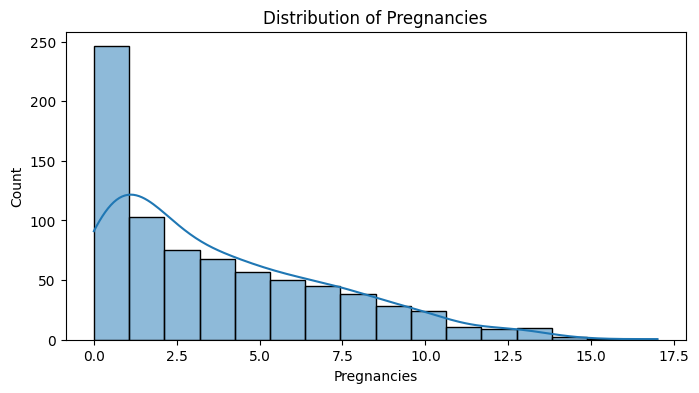

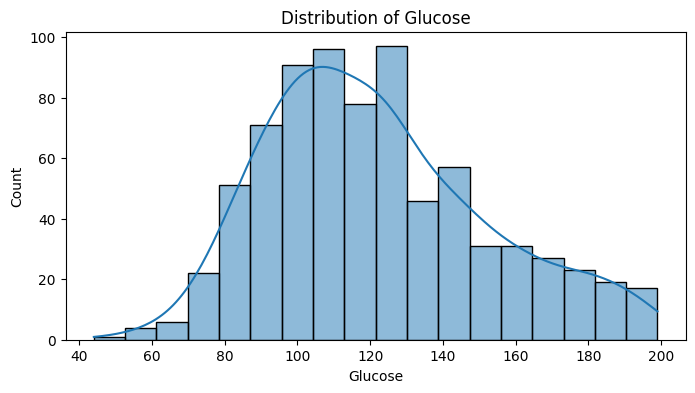

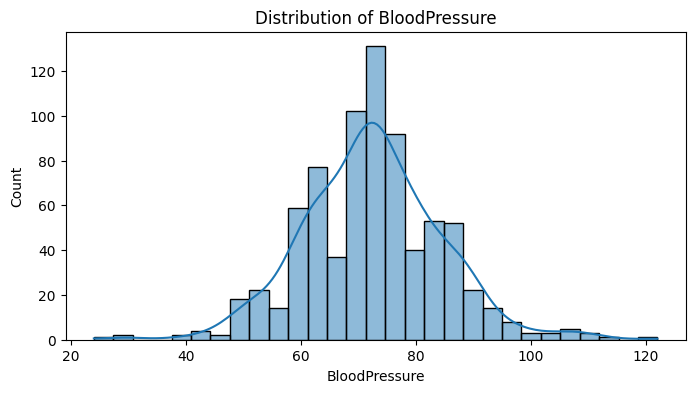

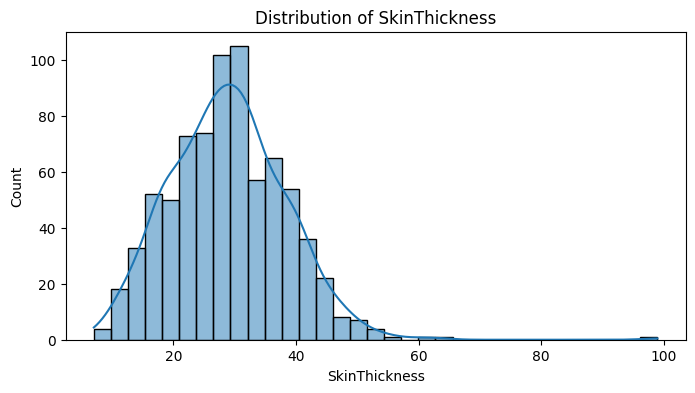

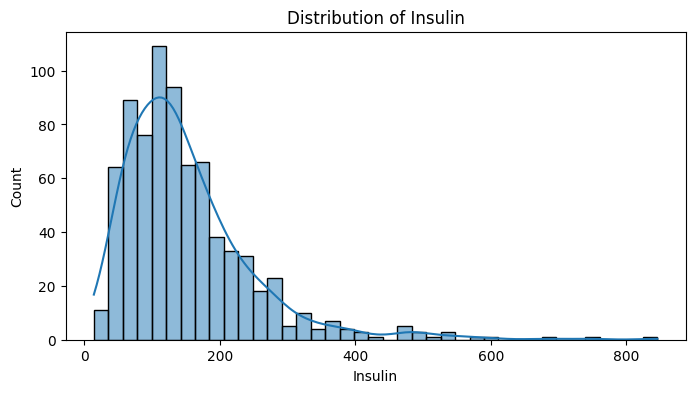

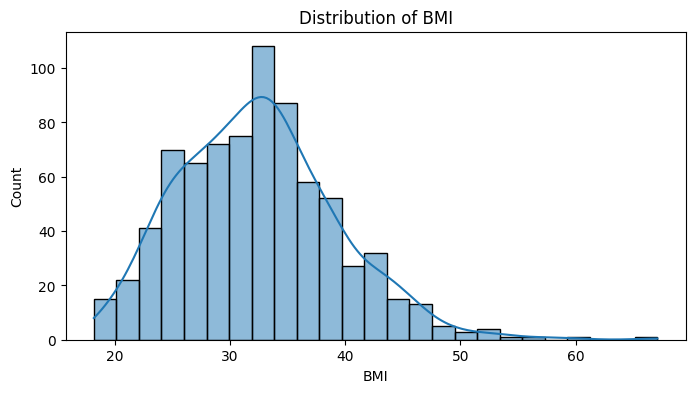

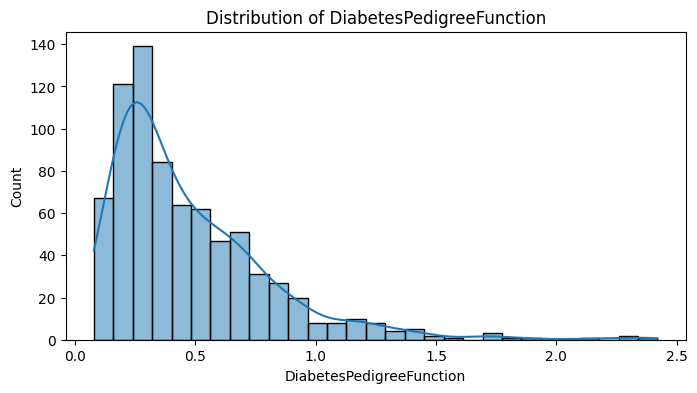

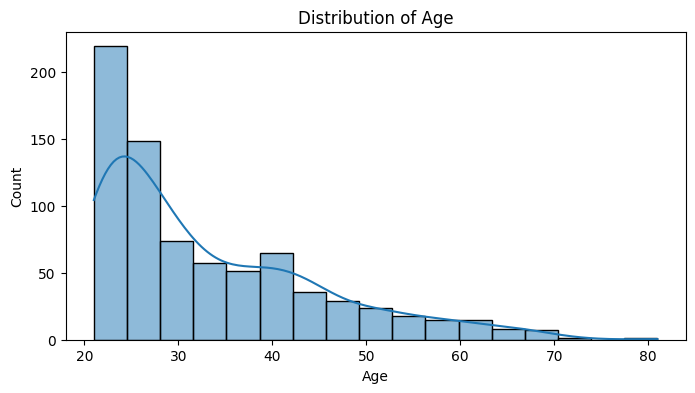

In [18]:
# Hostplot for each columns removing outcome
cols_without_outcome = dia.columns.drop('Outcome')
for col in cols_without_outcome:
    plt.figure(figsize=(8, 4))
    sns.histplot(dia[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

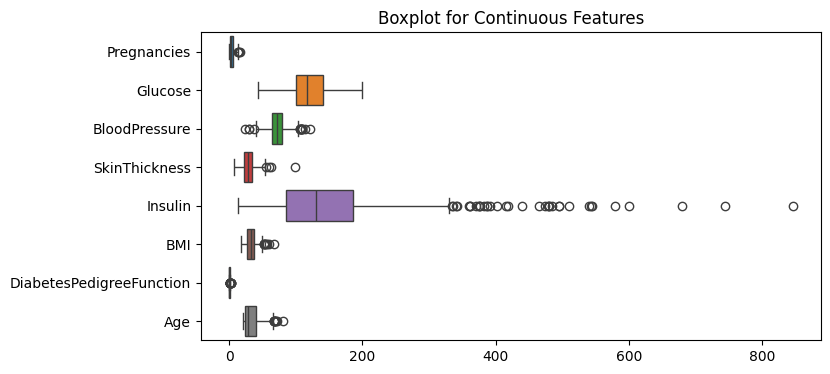

In [19]:
# boxplot to check outliers 
plt.figure(figsize=(8, 4))
sns.boxplot(data=dia[cols_without_outcome], orient='h')
plt.title('Boxplot for Continuous Features')
plt.show()

In [20]:
# Looks like insulin might have much more outliers, which is due to missing data that I am using knn imputer to fill it.

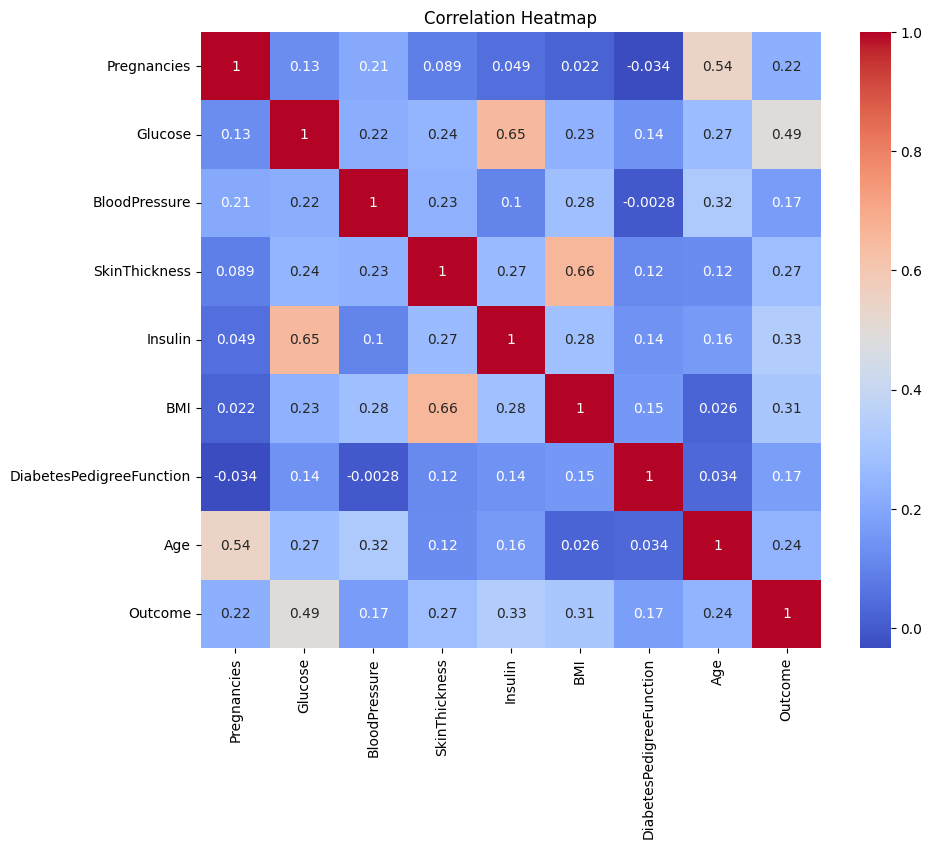

In [21]:
# Let's view coorrelations
plt.figure(figsize=(10, 8))
sns.heatmap(dia.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Per correlation
- Glucose and Outcome: Glucose shows a strong positive correlation with Outcome (0.49)
- BMI and Outcome: This indicates that higher BMI values may also contribute to a higher risk of diabetes
- Insulin and Outcome: Insulin has a moderate correlation with Outcome (0.33), which aligns with its role in blood sugar regulation and diabetes.I feel it might have stronger relationship, which may due to my loss data recovery
- Glucose and Insulin: There is a strong correlation between Glucose and Insulin (0.65),which reflects biological relationship
- BMI and SkinThickness: It is new to me, after do some research: This is logical, as thicker skinfold measurements often indicate higher body fat levels, which contribute to BMI.

## Apply Single AI Model

In [23]:
# Here I want to use different AI model to predict the outcome, since it is classification problem with supervisted learning
# 1 Logstic regression
# 2 KNN
# 3 Decsion Tree
# 4 SVM

In [21]:
# Split data
# Remove column of Pregnancies
X = dia[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = dia['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [23]:
# Apply Logstic Regression
# log_reg = LogisticRegression(random_state = 42).fit(X_train, y_train)
# y_pred_lr = log_reg.predict(X_test)
# Use quardic,scaler() pipeline
log_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(random_state=42, multi_class = 'multinomial'))
])
log_pipe.fit(X_train, y_train)
y_pred_lr = log_pipe.predict(X_test)
y_pred_lr

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

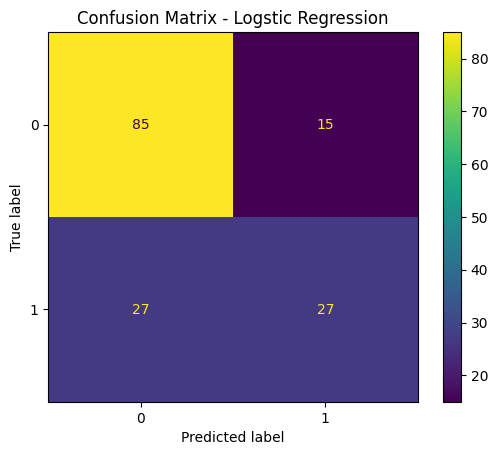

In [26]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
# Assuming binary classification (0 = no diabetes, 1 = diabetes)
disp1 = ConfusionMatrixDisplay(conf_matrix_lr, display_labels=[0, 1])
disp1.plot()
plt.title("Confusion Matrix - Logstic Regression")
plt.show()

In [24]:
# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

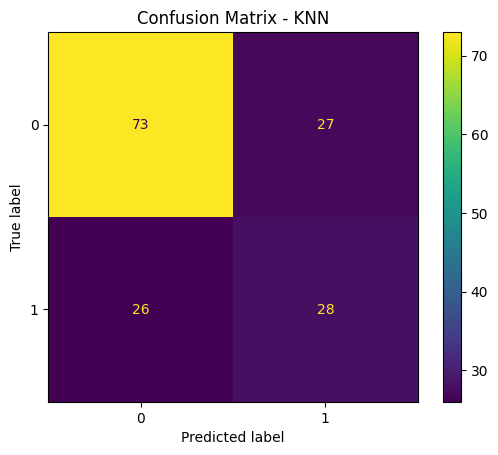

In [31]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
# Assuming binary classification (0 = no diabetes, 1 = diabetes)
disp1_knn = ConfusionMatrixDisplay(conf_matrix_knn, display_labels=[0, 1])
disp1_knn.plot()
plt.title("Confusion Matrix - KNN")
plt.show()

In [35]:
# Apply DecsionTree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, max_depth = 5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

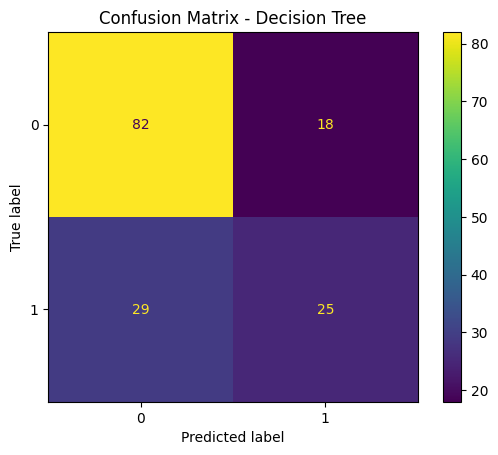

In [37]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
disp1_dt = ConfusionMatrixDisplay(conf_matrix_dt, display_labels=[0, 1])
disp1_dt.plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [38]:
# Apply SVM
svc = SVC().fit(X_train, y_train)
params = {"kernel": ['ploy', 'linear'],
          "gamma": [0.5]}
grid = GridSearchCV(svc, param_grid=params).fit(X_train, y_train)
grid_score = grid.score(X_test, y_test)
best_kernel = grid.best_params_['kernel']
svc = SVC(kernel=best_kernel).fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
y_pred_svc

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

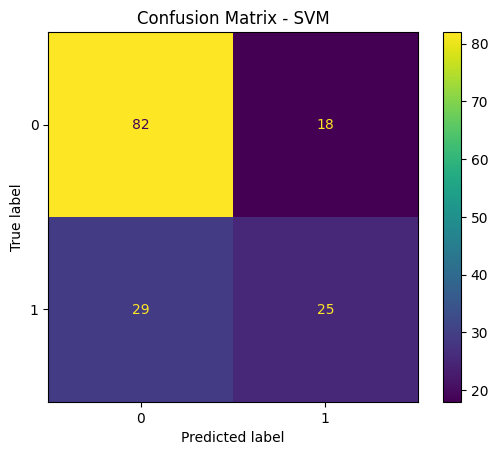

In [39]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svc)
disp1_svm = ConfusionMatrixDisplay(conf_matrix_svm, display_labels=[0, 1])
disp1_dt.plot()
plt.title('Confusion Matrix - SVM')
plt.show()

## Apply Advance Model

In [41]:
# Try 1.randome Forest
#     2. Ada boost
#.    3. Xg Boost

# Random Forest
n_trees = [1, 10, 100, 200, 500]
score = []
for tree in n_trees:
    rf = RandomForestClassifier(n_estimators=tree, oob_score=True, random_state=42).fit(X_train, y_train)
    score.append(rf.score(X_test, y_test))
print(score)
# Best accuracy is 10 sub tree

[0.6558441558441559, 0.7467532467532467, 0.7337662337662337, 0.7467532467532467, 0.7337662337662337]


In [42]:
# Further optimized with different depth
depths = [1, 3, 5, None]
for dep in depths:
  rf = RandomForestClassifier(n_estimators=10, max_depth=dep, oob_score=True, random_state=42).fit(X_train, y_train)
  print(f'Accuracy for depth {dep}: {rf.score(X_test, y_test)}')
# Therefore, best accuracy depth is None, which means nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. (min_samples_split = 2)
# Accuracy for depth None: 0.7467532467532467
# Best one for random forest is
best_rf = RandomForestClassifier(n_estimators=10, max_depth=None, oob_score=True, random_state=42).fit(X_train, y_train)
y_best_rf = best_rf.predict(X_test)

Accuracy for depth 1: 0.7142857142857143
Accuracy for depth 3: 0.7207792207792207
Accuracy for depth 5: 0.7402597402597403
Accuracy for depth None: 0.7467532467532467


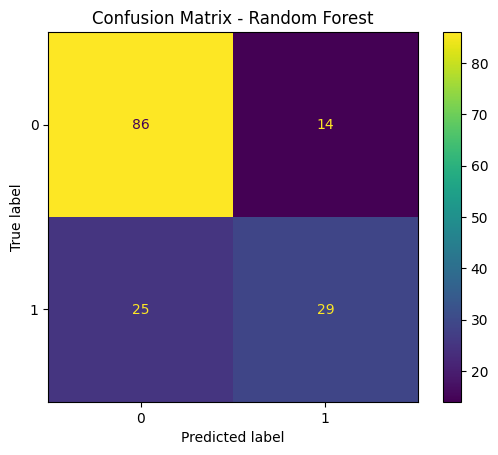

In [43]:
# Check Random forest confusion metrics

conf_matrix_rf = confusion_matrix(y_test, y_best_rf)
# Assuming binary classification (0 = no diabetes, 1 = diabetes)
disp1 = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=[0, 1])
disp1.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [47]:
# Try AdaBoost
params = {'n_estimators': [100, 200],
         'estimator__max_depth': [1, 2, 3]}
tree_grid = GridSearchCV(AdaBoostClassifier(estimator = DecisionTreeClassifier(), random_state = 42), 
                         param_grid=params).fit(X_train, y_train)
grid_acc = tree_grid.score(X_test, y_test)


### ANSWER CHECK
print(grid_acc)

0.7337662337662337


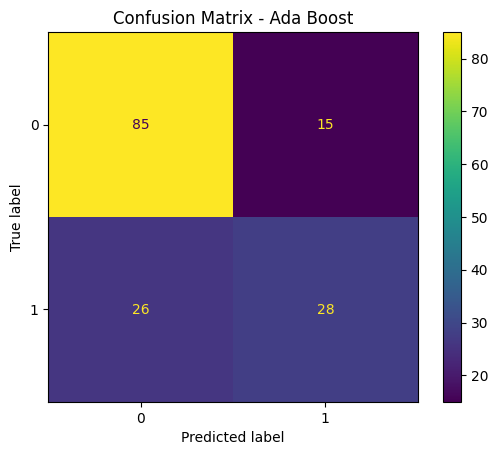

In [49]:
# Check Ada boost confusion metrics
y_ada = tree_grid.predict(X_test)
conf_matrix_ada = confusion_matrix(y_test, y_ada)
# Assuming binary classification (0 = no diabetes, 1 = diabetes)
disp1 = ConfusionMatrixDisplay(conf_matrix_ada, display_labels=[0, 1])
disp1.plot()
plt.title("Confusion Matrix - Ada Boost")
plt.show()

In [23]:
# Try xgboost
import xgboost as xgb
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
# Fit the model, test sets are used for early stopping.
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred_xg = clf.predict(X_test)


[0]	validation_0-logloss:0.58297
[1]	validation_0-logloss:0.54131
[2]	validation_0-logloss:0.52069
[3]	validation_0-logloss:0.50475
[4]	validation_0-logloss:0.50406
[5]	validation_0-logloss:0.50983


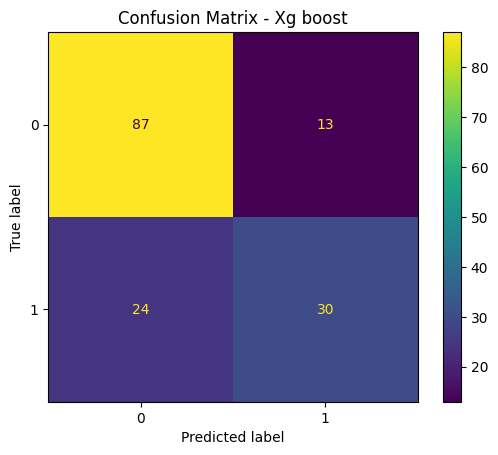

In [25]:
# Check xgboost confusion metrics

conf_matrix_xg = confusion_matrix(y_test, y_pred_xg)
# Assuming binary classification (0 = no diabetes, 1 = diabetes)
disp1_xg = ConfusionMatrixDisplay(conf_matrix_xg, display_labels=[0, 1])
disp1_xg.plot()
plt.title("Confusion Matrix - Xg boost")
plt.show()

## Evaluation

- MAE for Logistic Regression

In [31]:
# MAE for Logistic Regression
mae = mean_absolute_error(y_test, y_pred_lr)
print(f'Mean Absolute Error of Logistic Regression: {mae}')

Mean Absolute Error of Logistic Regression: 0.2727272727272727


- MAE for KNN

In [32]:
# MAE for KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f'Mean Absolute Error of KNN: {mae_knn}')

Mean Absolute Error of KNN: 0.34415584415584416


- MAE for DecisionTree

In [33]:
# MAE for DT
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f'Mean Absolute Error of DecisionTree: {mae_dt}')

Mean Absolute Error of DecisionTree: 0.3051948051948052


In [35]:
# MAE for SVM
mae_svc = mean_absolute_error(y_test, y_pred_svc)
print(f'Mean Absolute Error of SVM: {mae_svc}')

Mean Absolute Error of SVM: 0.2597402597402597


In [44]:
# MAE for RF
mae_rf = mean_absolute_error(y_test, y_best_rf)
print(f'Mean Absolute Error of RF: {mae_rf}')

Mean Absolute Error of RF: 0.2532467532467532


In [51]:
# MAE for ada boost
mae_ada = mean_absolute_error(y_test, y_ada)
print(f'Mean Aboslute Error of Ada boost: {mae_ada}')

Mean Aboslute Error of Ada boost: 0.2662337662337662


In [27]:
# MAE for xgboost as tryout
mae_xg = mean_absolute_error(y_test, y_pred_xg)
print(f'Mean Absolute Error of xg boost: {mae_xg}')

Mean Absolute Error of xg boost: 0.24025974025974026


## Conclusion


* Random Forest seems to be the most effective model in my case based on MAE, as it minimizes the average absolute error the most.(not considering Xg boost
* SVM and Logistic Regression are also good options, but Random Forest is the best in terms of minimizing error.
* The KNN and Decision Tree models perform worse compared to the others based on MAE, so they might not be as reliable for this specific task.

## Next Step

In [52]:
# Next I want to optimize further of Random forest to reduce false negitive means the patient has diabetes, but our model miss predicting 
# him/her as no diabetes
# Therefore, per confusion metrics
# False Negative (FN): 25 (These are the individuals with diabetes who are incorrectly predicted as not having diabetes).
# I need to optimize to reduce false negative case
# Recall = TP / TP + FP = 29 / 29 + 25 = 53%

### How to Minimize False Negatives:
In my case, since False Negatives (25) are individuals who have diabetes but are incorrectly predicted as not having it, one way to reduce them would be to:
Lower the decision threshold for predicting diabetes. By doing this, the model will be more likely to classify someone as positive (diabetic), potentially reducing the number of false negatives.

In [28]:
# Lower the Decision Threshold: by default > 0.5 is positive, let me change to 0.4
best_rf = RandomForestClassifier(n_estimators=10, max_depth=None, oob_score=True, random_state=42).fit(X_train, y_train)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
# print(y_pred_proba)
# lower threshold
threshold = 0.4
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
# print(y_pred_adjusted)

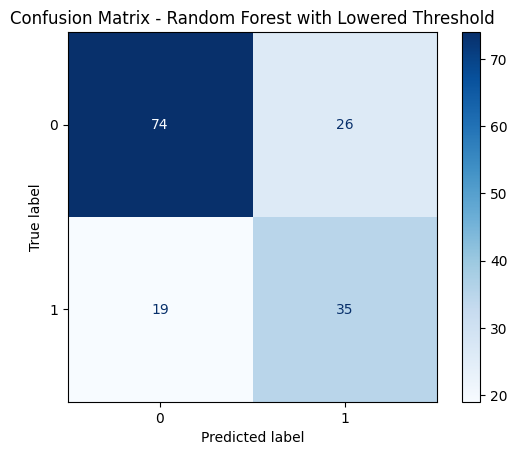

In [29]:
# New confustion metrics
conf_matrix_rf = confusion_matrix(y_test, y_pred_adjusted)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=[0, 1])  # Assuming binary classification (0 = no diabetes, 1 = diabetes)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest with Lowered Threshold")
plt.show()
# We can see false postive down to 19 from 25 originally)

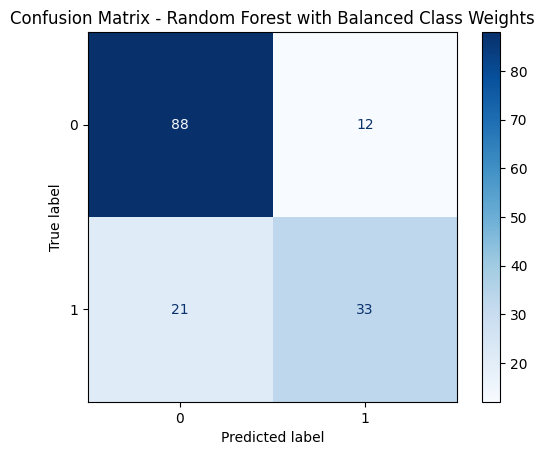

In [59]:
# Try changing the weight - class_weight='balanced'
best_rf_balanced = RandomForestClassifier(n_estimators=10, max_depth=None, oob_score=True, 
                                          random_state=42, class_weight='balanced').fit(X_train, y_train)

# Make predictions
y_pred_rf_balanced = best_rf_balanced.predict(X_test)

# Generate confusion matrix
conf_matrix_rf_balanced = confusion_matrix(y_test, y_pred_rf_balanced)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix_rf_balanced, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest with Balanced Class Weights")
plt.show()

[0 3 6 4 5 2 1]


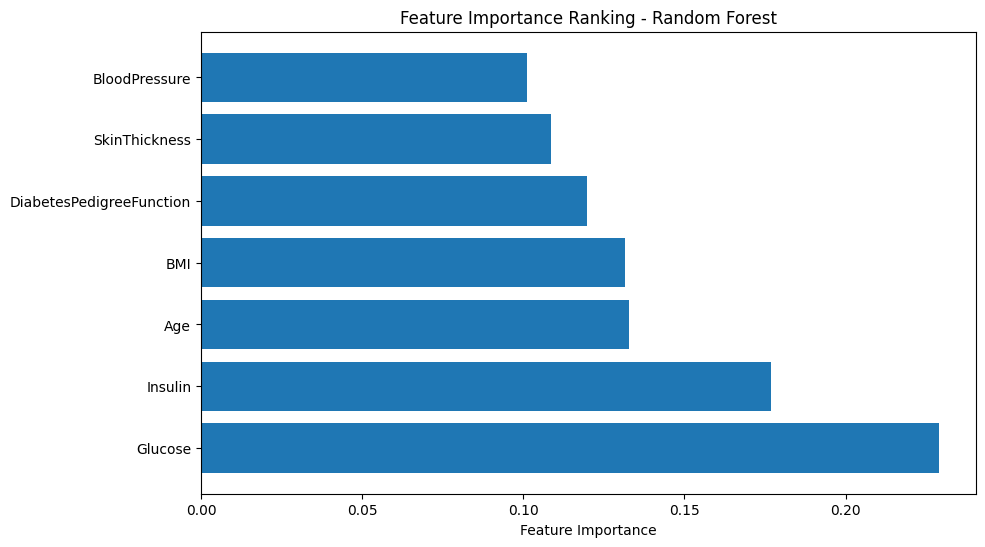

In [35]:
# Both way reduce the false negatives.
# Try to get the feature importance ranking per random forest 

# Get feature importances
feature_importances = best_rf.feature_importances_
# Sort in descending order
indices = np.argsort(feature_importances)[::-1]
print(indices)
features = X_train.columns
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), feature_importances[indices], align="center")
plt.yticks(range(len(features)), features[indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance Ranking - Random Forest")
plt.show()
# Therefore to cause diabetes: glucose > insulin > age > BMI 